In [1]:
import tensorflow as tf


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import tensorflow as tf

# Load the Fashion MNIST dataset using Keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Print some information about the dataset
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [5]:
train_labels[1]

0

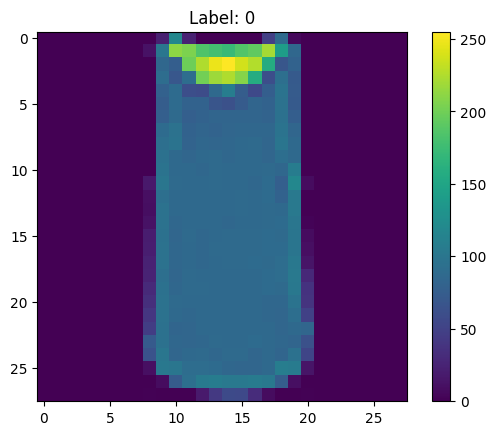

In [6]:
# Choose an index to display a specific image from the dataset
index_to_display = 2  # Change this to any index you want to visualize

# Display the image
plt.figure()
plt.imshow(train_images[index_to_display])  
plt.colorbar()  # Add a colorbar to the image (optional)
plt.title(f"Label: {train_labels[index_to_display]}")  # Show the corresponding label
plt.show()

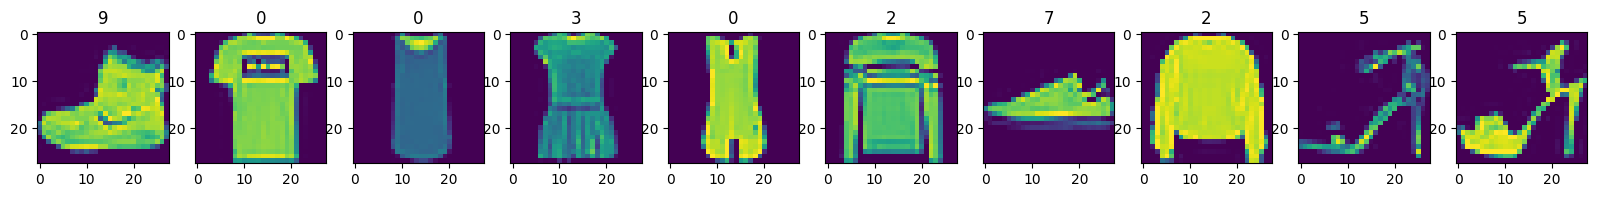

In [7]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
# Loop four times and get images 
for idx in range(0,10):
    sample= train_images[idx]
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample))
    # add image label
    ax[idx].title.set_text(train_labels[idx])

#### Or we can plot using this too

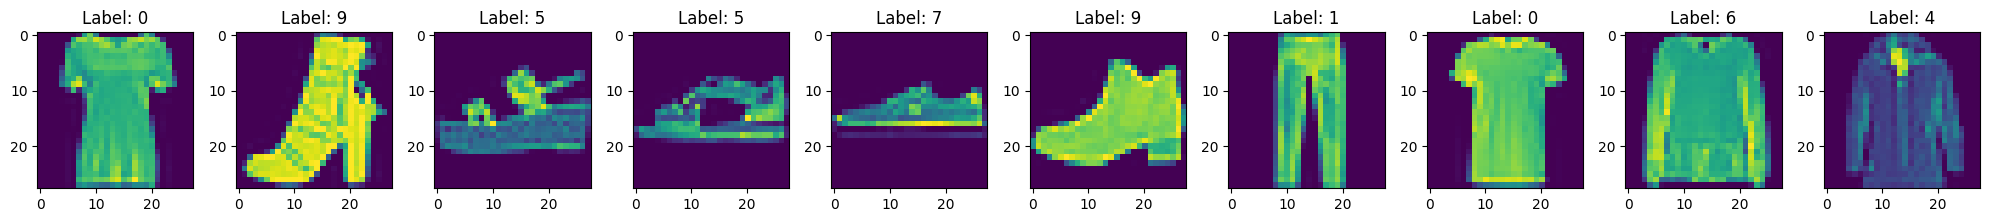

In [8]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=10, figsize=(20, 20))

# Loop ten times to get images from index 10 to 19
for idx in range(10, 20):
    sample = train_images[idx]    
    # Calculate the subplot index (0 to 9)
    subplot_index = idx - 10    
    # Plot the image using a specific subplot 
    ax[subplot_index].imshow(np.squeeze(sample))    
    # Add image label
    ax[subplot_index].set_title(f"Label: {train_labels[idx]}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


In [9]:
def scale_images(images):
    return images/255

### Building pipeline
#### consists of: load, map, cache, shuffle, batch, prefetch

In [10]:
# Convert it to a TensorFlow Dataset to use pre built functions for mapping caching etc
train_images = tf.data.Dataset.from_tensor_slices(train_images)

In [11]:
# already loaded the data
train_images= train_images.map(scale_images)
# Cache the dataset for that batch 
train_images= train_images.cache()
# Shuffle
train_images= train_images.shuffle(buffer_size=60000)
# Batch into 128 images per sample
train_images= train_images.batch(128)
# Reduces the likelihood of bottlenecking 
train_images= train_images.prefetch(64)

In [12]:
for batch_images in train_images.take(1):
    # Take the first batch for inspection
    batch_shape = batch_images.shape
    print("Shape of a batch of images:", batch_shape)

Shape of a batch of images: (128, 28, 28)


In [13]:
#  check the shape of individual images within the batch, you can further iterate:
for image in batch_images:
    image_shape = image.shape
    print("Shape of an individual image:", image_shape)

Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual image: (28, 28)
Shape of an individual im

### Building neural network

In [14]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [15]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(units= 7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    # very bad image as it has 128 channels. We will eventually get to 1 channel as original sample already is (28,28,1)

    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    # upsampling 'zooms in' on the image by increasing height and width
    # we did this since we originally had an image with 7x7 dimensions but we need 28x28
    # we can add another upsampling layer just now but it wont catch complexities so we will instead add other layers for accuracy and stuff
    
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    # we just want to get parameters now so we have more information about images
    # this is why we dont do upsampling rn, we just pass it to convulutional layer
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
     # Convolutional block 3
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))



    
    return model

In [16]:
generator= build_generator()

In [17]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [18]:
generator.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [20]:
imgs = generator.predict(np.random.randn(4,128,1))
# 4= number of images
# 128= number of dimensions of an image that the generator is expecting
# 1= means that its a scalar
print(imgs.shape)
imgs

1/1 [==============================] - 1s 902ms/step
(4, 28, 28, 1)


array([[[[0.49755803],
         [0.49465227],
         [0.4938399 ],
         ...,
         [0.50211525],
         [0.5010603 ],
         [0.5003419 ]],

        [[0.4964323 ],
         [0.49815014],
         [0.4933369 ],
         ...,
         [0.49664214],
         [0.49798116],
         [0.4964585 ]],

        [[0.497704  ],
         [0.49480456],
         [0.48997414],
         ...,
         [0.4984355 ],
         [0.50449514],
         [0.49542582]],

        ...,

        [[0.49635342],
         [0.49946964],
         [0.49694517],
         ...,
         [0.49840698],
         [0.5026773 ],
         [0.49920318]],

        [[0.5010271 ],
         [0.5013231 ],
         [0.5033635 ],
         ...,
         [0.5036345 ],
         [0.50519246],
         [0.5022289 ]],

        [[0.50241745],
         [0.49693677],
         [0.5000228 ],
         ...,
         [0.5000836 ],
         [0.5004361 ],
         [0.4999975 ]]],


       [[[0.49417716],
         [0.50090986],
         [0.49

In [71]:
b = generator.predict(np.random.randn(2,128,1))


1/1 [==============================] - 0s 31ms/step


In [72]:
print(b.shape)
b

(2, 28, 28, 1)


array([[[[0.99999976],
         [1.        ],
         [1.        ],
         ...,
         [0.9999994 ],
         [0.9998885 ],
         [0.992099  ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [0.99999785],
         [0.99863786]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [0.9999998 ],
         [0.9995575 ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.9999998 ],
         [0.9998644 ],
         [0.98368895]],

        [[0.9999912 ],
         [0.9999999 ],
         [1.        ],
         ...,
         [0.999952  ],
         [0.99663657],
         [0.9287058 ]],

        [[0.9976022 ],
         [0.9996639 ],
         [0.9998973 ],
         ...,
         [0.99199724],
         [0.93396306],
         [0.74755895]]],


       [[[0.9999966 ],
         [1.        ],
         [1.  

In [38]:
temp= np.random.randn(4,128,1)
print(temp.shape)
temp

(4, 128, 1)


array([[[-0.73075267],
        [-1.886809  ],
        [ 0.70254051],
        [-1.47065692],
        [-0.41023447],
        [-0.85193686],
        [ 0.98168624],
        [ 0.36819052],
        [ 0.48292639],
        [-1.62680183],
        [ 1.89308231],
        [ 0.82046536],
        [ 2.05064753],
        [ 0.76098311],
        [ 0.65871717],
        [ 1.25895688],
        [ 0.96286642],
        [-0.16277137],
        [ 0.54214137],
        [-2.39866324],
        [ 1.40085945],
        [ 0.82320887],
        [-0.20611893],
        [ 0.29652613],
        [-0.05242449],
        [ 0.14468771],
        [-0.85893139],
        [ 1.09410961],
        [-0.67695865],
        [-1.03949119],
        [-1.23889273],
        [ 0.16962658],
        [-1.24730487],
        [-1.19444494],
        [ 1.41068922],
        [ 1.00995325],
        [ 1.13007964],
        [-1.51284902],
        [ 0.20150362],
        [ 0.80519628],
        [-0.1254808 ],
        [ 0.01625816],
        [-0.21795241],
        [ 0

In [74]:
# shape of single image 
imgs[1].shape

(28, 28, 1)

1/1 [==============================] - 0s 117ms/step


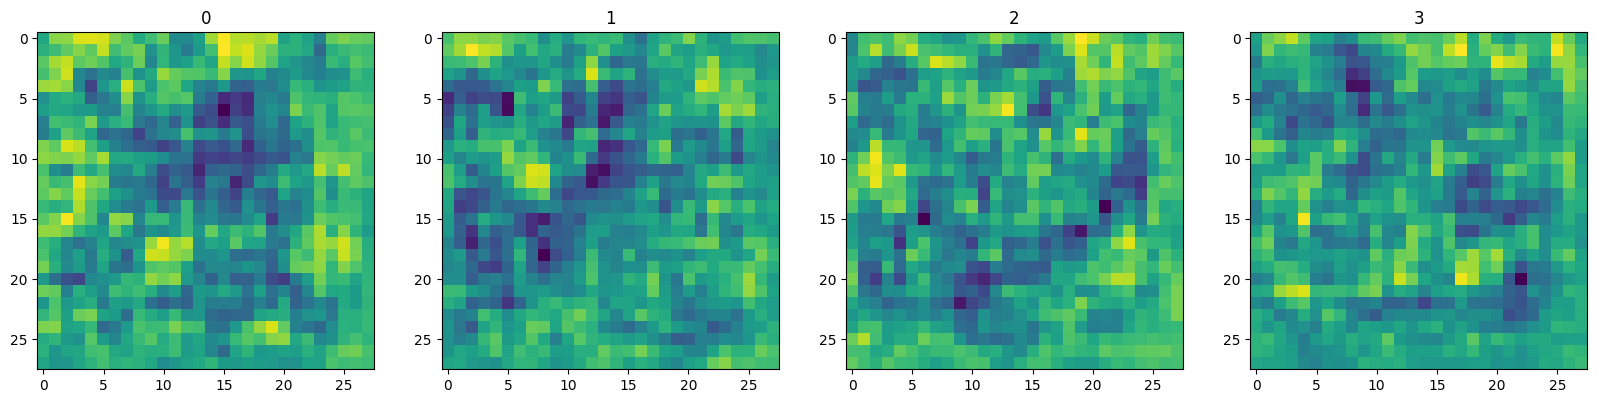

In [35]:
# Generate new fashion
imgs = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(imgs): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img)) # squeeze allows us to squeeze from 28,28,1 to 28,28
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

1/1 [==============================] - 0s 48ms/step


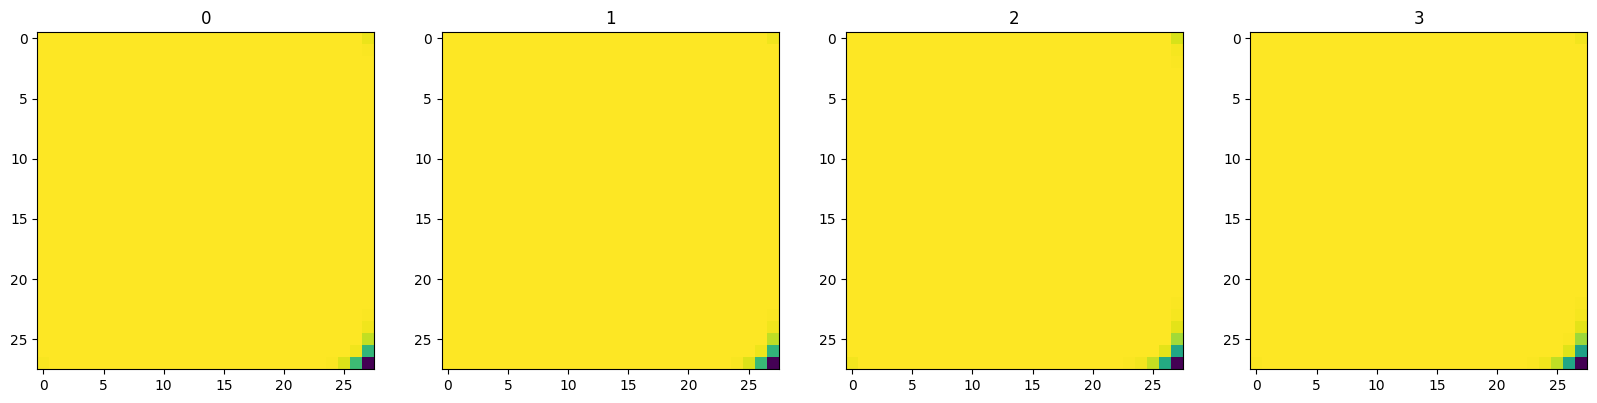

In [79]:
# Generate new fashion
c = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(c): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img)) # squeeze allows us to squeeze from 28,28,1 to 28,28
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

### Discriminator

In [23]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1))) #(28,28,1) is the oupute shape from generator
    # 32 is the number of filters each image will go through, each filter learns to detect a different pattern or feature
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4)) # dropout layer helps prevent overfitting

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    

    



    return model

In [24]:
discriminator= build_discriminator()

In [25]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [26]:
discriminator.predict(imgs)

1/1 [==============================] - 0s 441ms/step


array([[0.5159426 ],
       [0.5159183 ],
       [0.5161126 ],
       [0.51603794]], dtype=float32)

### Losses and optimizers

In [27]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy

In [28]:
g_opt = Adam(learning_rate=0.0001)  # generator learning rate needs to be faster than discriminator's
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [29]:
from tensorflow.keras.models import Model


### Custom training loop

In [ ]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

In [37]:
b=tf.random.normal((2, 128, 1))
b

<tf.Tensor: shape=(2, 128, 1), dtype=float32, numpy=
array([[[ 1.4231806 ],
        [ 0.38468114],
        [ 2.387566  ],
        [-0.12127011],
        [ 0.04548683],
        [-0.28401133],
        [ 1.0759754 ],
        [-1.1801524 ],
        [ 0.4019179 ],
        [ 0.9873772 ],
        [ 0.85885054],
        [ 0.14990821],
        [ 0.08462712],
        [-0.54793864],
        [-0.12459631],
        [ 0.8917812 ],
        [-1.087137  ],
        [-0.18741941],
        [ 0.7793233 ],
        [ 0.9695719 ],
        [-0.326838  ],
        [ 0.06684344],
        [ 0.0692741 ],
        [ 0.12044076],
        [ 1.3421909 ],
        [-0.94623   ],
        [-1.2761073 ],
        [ 1.1627406 ],
        [ 0.21223113],
        [-0.77591854],
        [ 0.04184905],
        [-1.0949358 ],
        [-0.2695696 ],
        [-1.2920091 ],
        [ 1.663683  ],
        [ 0.16610478],
        [-0.00415178],
        [-1.292361  ],
        [-0.8131611 ],
        [ 0.5733151 ],
        [ 0.22153255],
    

In [65]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal(( 2, 128, 1)), training=False) #generate 2 images
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: #sets up a gradient tape, which is used to record the operations performed within it for later gradient computation during backpropagation
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # # Apply backpropagation - nn learn 

        #calculate gradients
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 

        #update the weights of the discriminator in a direction that reduces the loss
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables)) 
        
        # Train the generator 
        with tf.GradientTape() as g_tape: #sets up a gradient tape to record operations during the forward pass of the generator
            # Generate some new images
            gen_images = self.generator(tf.random.normal((2,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [66]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [67]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### Callback

In [68]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [82]:
class ModelMonitor(Callback):
    def __init__(self, num_img=2, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        # Check if the "images" directory exists, and create it if not
        if not os.path.exists('images'):
            os.makedirs('images')

        # Save generated images to the "images" directory
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))
        

In [91]:
# Training
# Recommend 2000 epochs
hist = fashgan.fit(train_images, epochs=2000, callbacks=[ModelMonitor()])

Epoch 1/2000


469/469 [==============================] - 737s 2s/step - d_loss: 0.2684 - g_loss: 2.6713
Epoch 2/2000
469/469 [==============================] - 736s 2s/step - d_loss: 0.2659 - g_loss: 2.8605
Epoch 3/2000
469/469 [==============================] - 735s 2s/step - d_loss: 0.2668 - g_loss: 2.8888
Epoch 4/2000
469/469 [==============================] - 735s 2s/step - d_loss: 0.2668 - g_loss: 2.9056
Epoch 5/2000
469/469 [==============================] - 736s 2s/step - d_loss: 0.2795 - g_loss: 0.6287
Epoch 6/2000
469/469 [==============================] - 736s 2s/step - d_loss: 0.2721 - g_loss: 0.6371
Epoch 7/2000
469/469 [==============================] - 736s 2s/step - d_loss: 0.2717 - g_loss: 0.4868
Epoch 8/2000
469/469 [==============================] - 736s 2s/step - d_loss: 0.2704 - g_loss: 0.4404
Epoch 9/2000
469/469 [==============================] - 736s 2s/step - d_loss: 0.2704 - g_loss: 0.3154
Epoch 10/2000
469/469 [==============================] - 738s 2s/step - d_loss: 0.2714

In [90]:
hist.history

{'d_loss': [0.3008578419685364,
  0.29959923028945923,
  0.29511332511901855,
  0.2906520962715149,
  0.2884800434112549,
  0.2941044867038727,
  0.3099132478237152,
  0.3239474296569824,
  0.3022291362285614,
  0.3095143437385559,
  0.30204373598098755,
  0.29606613516807556,
  0.2920133173465729,
  0.30449628829956055,
  0.3106839954853058,
  0.31231337785720825,
  0.3057703971862793,
  0.2863315939903259,
  0.2873590290546417,
  0.2758548855781555],
 'g_loss': [0.1754896342754364,
  0.2783110737800598,
  0.1896747350692749,
  0.21366412937641144,
  0.15286971628665924,
  0.08963818848133087,
  0.08248560130596161,
  0.083441823720932,
  0.09432383626699448,
  0.1254645735025406,
  0.11904719471931458,
  0.1357721984386444,
  0.1186409592628479,
  0.11186814308166504,
  0.09019626677036285,
  0.11001987755298615,
  0.09910653531551361,
  0.10311241447925568,
  0.11175123602151871,
  2.0438241958618164]}

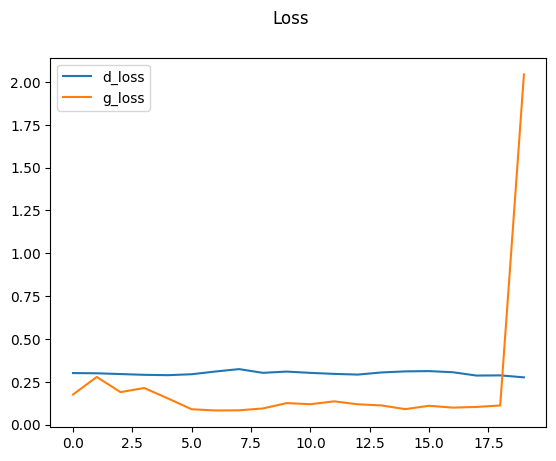

In [85]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

### Test Out the Generator

In [88]:
# generate images
file_path = os.path.join('archive', 'generatormodel.h5')

# Check if the file exists
if not os.path.exists(file_path):
    # If it doesn't exist, create an empty file
    with open(file_path, 'w') as f:
        pass  # This will create an empty file

# Now you can load the weights
generator.load_weights(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'archive\\generatormodel.h5'